In [1]:
###data processing assoicated package
import pickle
import pprint
import gc 
import datetime
import numpy as np
###drawing package
import os
os.environ['PROJ_LIB'] = 'C:\\Users\\jerry\\anaconda3\\Library\\share\\'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import glob
import netCDF4 as nc
import pickle
import csv
import numpy.ma as ma

In [2]:
def fog_filter(band,topo,height,hbt,lbt):
    out=ma.masked_where(topo<=height, topo)
    #print(out.shape)
    cloud_mask=np.zeros((250,201))
    for i in range(1,249):
        for j in range(1,200):
            if out[i+1,j]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1
            if out[i-1,j]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1
            if out[i,j+1]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1
            if out[i,j-1]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1

            if out[i+1,j+1]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1
            if out[i+1,j-1]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1
            if out[i-1,j+1]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1
            if out[i-1,j-1]>0 and topo[i,j]<height and band[i,j]<=hi_bt and  band[i,j]>=lo_bt:
                cloud_mask[i,j]=1    
    return cloud_mask

In [3]:
def read_hua(day):
    filename=glob.glob('test_sounding/202002' + day + '00.csv')
    s20200208=open(filename[0])
    csvreader = csv.reader(s20200208) 
    header = []
    header = next(csvreader)
    header
    rows = []
    for row in csvreader:
        rows.append(row)
    hua=np.zeros((40,3))
    for j in range(0,40):
        data=rows[j]
        hua[j,0]=float(data[3])
        if hua[j,0]>=8000:
            break
        hua[j,1]=float(data[4])
        hua[j,2]=float(data[8])
    name=filename[0]
    hr=name[22:24]
    return hua,hr 

In [4]:
def read_hua_ori(day):
    filename=glob.glob('hualien2020/46699-202002' + day + '00.edt.txt')
    ori_edt=open(filename[0],encoding='utf-8')
    csvreader = csv.reader(ori_edt,delimiter='\t') 
    rows = []
    for row in csvreader:
        rows.append(row)
    hu_h = []
    hu_rh=[]
    for i in range(3,len(rows)):
    #print(rows[i])
        line=rows[i]
        hi=line[1]
        if float(hi[0:int(len(hi)-1)])>8000:
            break
        rh=line[4]
        hu_h.append(float(hi[0:int(len(hi)-1)]))
        hu_rh.append(float(rh[0:int(len(rh)-1)]))
    return np.array(hu_h),np.array(hu_rh) 

In [5]:
x = np.arange(85.01,205.01,0.02)
y = np.arange(-59.99,60.01,0.02)
local13_lon=x[1700:1901]
local13_lat=y[4050:4300]
#print(local02_lon.shape)
#print(band13.shape)
hi13_lon=x[1675:2175]
hi13_lat=y[4050:4300]

In [6]:
x = np.arange(85.005,205.005,0.01)
y = np.arange(-59.995,60.005,0.01)
local_lon=x[3400:3801]
local_lat=y[8100:8600]
print(local_lon.shape)
hi_lon=x[3350:4350]
hi_lat=y[8100:8600]
print(hi_lon.shape)
#print(hi_lat.shape)
hii_lon=hi_lon[50:451]
print(hii_lon.shape)

(401,)
(1000,)
(401,)


In [7]:
with open('topo_regrid_1km.pkl', 'rb') as f:
    topo = pickle.load(f)
with open('topo_regrid_2km.pkl', 'rb') as f:
    topo02 = pickle.load(f)

In [10]:
day=str(20)
#day='0'+day
hu_h,hu_rh=read_hua_ori(day)
hua, hr = read_hua(day)

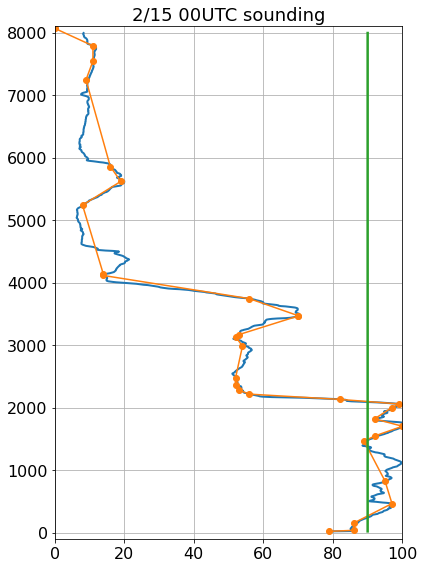

In [54]:
for i in range(14,15):
    day=str(i+1)
    if i <9:
        day='0'+day
    hu_h,hu_rh=read_hua_ori(day)
    hua, hr = read_hua(day)
    test90=np.zeros(np.size(hu_rh))
    test90[:]=90
    a=np.where(hu_rh>=90)
#print(a)
#print(hu_h[hu_rh>=90])
#print(hu_h[165:300])
#print(hu_rh[165:300])
    fig = plt.figure(figsize=(6,8)) 
    plt.plot(hu_rh,hu_h,lw=2)
    plt.plot(hua[0:31,2],hua[0:31,0],marker='o')
    plt.plot(test90,hu_h,lw=2.5)
    plt.axis([0,100,-100,8100])
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.grid()
    plt.title('2/15 00UTC sounding',fontsize=18)
    plt.tight_layout()
    plt.savefig('sounding15.png',dpi=300)

In [160]:
for i in range(0,29):
    day=str(i+1)
    if i <9:
        day='0'+day
    #print('day',day)
    hua, hr = read_hua(day)
    hu_h,hu_rh=read_hua_ori(day)
#### find cloud and cloud top
    cloudtop=hua[hua[:,2]>=90,:]
    if np.size(cloudtop>0):
        #print('day',day)
        #print('hua')
        topwhere=np.where(hua[:,2]>=90)
        #print(topwhere)
        cloudlocate=topwhere[0]
        #print(cloudlocate)
        toplocate=[]
        botlocate=[]
        for k in range(0,np.size(cloudlocate)-1):
            if cloudlocate[k+1]-cloudlocate[k]>1.1:
                toplocate.append(cloudlocate[k])
        for k in range(0,np.size(cloudlocate)):
            if k<1:
                botlocate.append(cloudlocate[k])
            if k>0:
                #print(cloudlocate[k]-cloudlocate[k-1])
                if cloudlocate[k]-cloudlocate[k-1]>1.1:
                    botlocate.append(cloudlocate[k])
        toplocate.append(cloudlocate[np.size(cloudlocate)-1])
        #print(hua[toplocate,0])
        #print(hua[botlocate,0])
    cloudtop=hu_rh[hu_rh>=90]
    if np.size(cloudtop>0):
        #print('hua ori')
        topwhere=np.where(hu_rh>=90)
        #print(topwhere)
        cloudlocate=topwhere[0]
        #print(cloudlocate)
        ori_toplocate=[]
        ori_botlocate=[]
        for k in range(0,np.size(cloudlocate)-1):
            if  cloudlocate[k+1]-cloudlocate[k]>1.1 and hu_h[cloudlocate[k+1]]-hu_h[cloudlocate[k]]>50:
                ori_toplocate.append(cloudlocate[k])
        for k in range(0,np.size(cloudlocate)):
            if k<1:
                ori_botlocate.append(cloudlocate[k])
            if k>0:
                #print(cloudlocate[k]-cloudlocate[k-1])
                if cloudlocate[k]-cloudlocate[k-1]>1.1 and hu_h[cloudlocate[k]]-hu_h[cloudlocate[k-1]]>50:
                    ori_botlocate.append(cloudlocate[k])
        ori_toplocate.append(cloudlocate[np.size(cloudlocate)-1])
        if  np.size(ori_toplocate) > np.size(toplocate):
            print('day',day)
            print('hua')
            print(hua[toplocate,0])
            print(hua[botlocate,0])
            print('hua ori')
            print(hu_h[ori_toplocate])
            print(hu_h[ori_botlocate])
            print('       ')

day 02
hua
[1857.]
[1461.]
hua ori
[1124. 1869. 1945.]
[1022. 1401. 1935.]
       
day 03
hua
[ 914. 2320.]
[ 854. 2320.]
hua ori
[ 932. 1452. 2352.]
[ 816. 1413. 1955.]
       
day 04
hua
[ 432. 2457.]
[ 400. 2457.]
hua ori
[  24.   98.  476. 2457.]
[  24.   98.  329. 2450.]
       
day 05
hua
[2649.]
[596.]
hua ori
[  37.  903. 2771. 3105.]
[  23.  432.  974. 2953.]
       
day 06
hua
[2665.]
[2025.]
hua ori
[1876. 2665.]
[1858. 1946.]
       
day 10
hua
[2421.]
[774.]
hua ori
[  23. 2438.]
[ 23. 752.]
       
day 11
hua
[7537.]
[7073.]
hua ori
[7584. 7995.]
[6954. 7636.]
       
day 13
hua
[ 481. 2182. 4180.]
[ 481. 2075. 4180.]
hua ori
[ 513.  978. 1673. 2099. 2182. 4200.]
[ 362.  968. 1641. 1732. 2170. 4033.]
       
day 14
hua
[1625.]
[1531.]
hua ori
[ 618. 1069. 1660.]
[ 536.  866. 1216.]
       
day 21
hua
[1694. 2483.]
[ 203. 2291.]
hua ori
[ 634. 1700. 2483.]
[ 191.  727. 2101.]
       
day 23
hua
[3242.]
[898.]
hua ori
[  59. 3242.]
[ 27. 717.]
       
day 25
hua
[1495.]
[14

day 01
hua ori
[2060.]
[1017.]
       
271.0
day 02
hua ori
[1124. 1869. 1945.]
[1022. 1401. 1935.]
       
276.0
day 03
hua ori
[ 932. 1452. 2352.]
[ 816. 1413. 1955.]
       
275.0
day 04
hua ori
[  24.   98.  476. 2457.]
[  24.   98.  329. 2450.]
       
276.0
day 05
hua ori
[  37.  903. 2771. 3105.]
[  23.  432.  974. 2953.]
       
275.0
day 06
hua ori
[1876. 2665.]
[1858. 1946.]
       
272.0
day 07
hua ori
[1143. 1404. 3546.]
[ 952. 1395. 3503.]
       
282.0


<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
C:\Users\jerry\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


day 08
hua ori
[2164.]
[759.]
       
276.0


<ipython-input-177-fa0a5128470d>:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,8))


day 09
hua ori
[2728. 3637.]
[1151. 3097.]
       
273.0
day 10
hua ori
[  23. 2438.]
[ 23. 752.]
       
276.0
day 11
hua ori
[7584. 7995.]
[6954. 7636.]
       
241.0
day 12
hua ori
[4018.]
[3399.]
       
279.0
day 13
hua ori
[ 513.  978. 1673. 2099. 2182. 4200.]
[ 362.  968. 1641. 1732. 2170. 4033.]
       
283.0
day 14
hua ori
[ 618. 1069. 1660.]
[ 536.  866. 1216.]
       
284.0
day 15
hua ori
[1371. 2088.]
[ 236. 1483.]
       
284.0
day 16
hua ori
[2148.]
[104.]
       
282.0
day 17
hua ori
[2051. 4531.]
[ 742. 2643.]
       
276.0
day 18
hua ori
[2474.]
[1625.]
       
269.0
day 19
hua ori
[1397. 2251.]
[ 794. 1655.]
       
273.0
day 20
hua ori
[2123.]
[1736.]
       
276.0
day 21
hua ori
[ 634. 1700. 2483.]
[ 191.  727. 2101.]
       
273.0
day 22
day 23
hua ori
[  59. 3242.]
[ 27. 717.]
       
274.0
day 24
hua ori
[2549.]
[29.]
       
278.0
day 25
hua ori
[1524. 1637.]
[1468. 1621.]
       
278.0
day 26
hua ori
[2294. 3462.]
[ 466. 2393.]
       
276.0
day 27
hua ori
[285

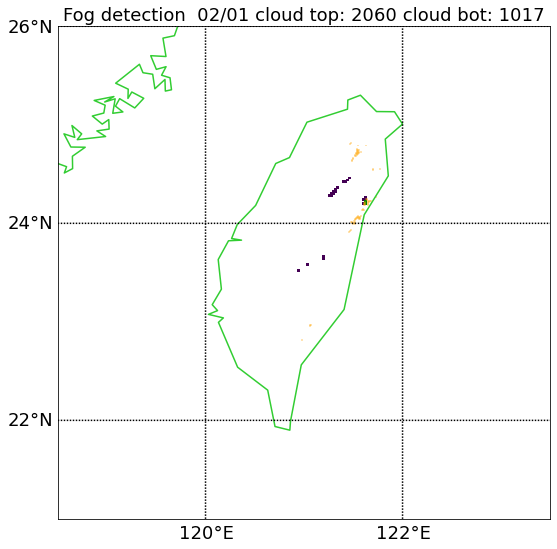

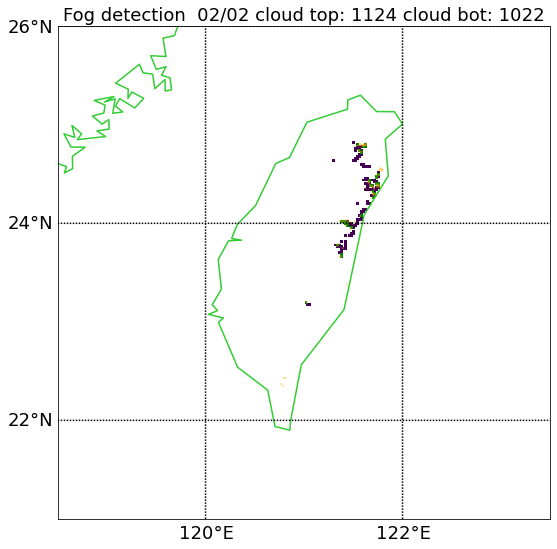

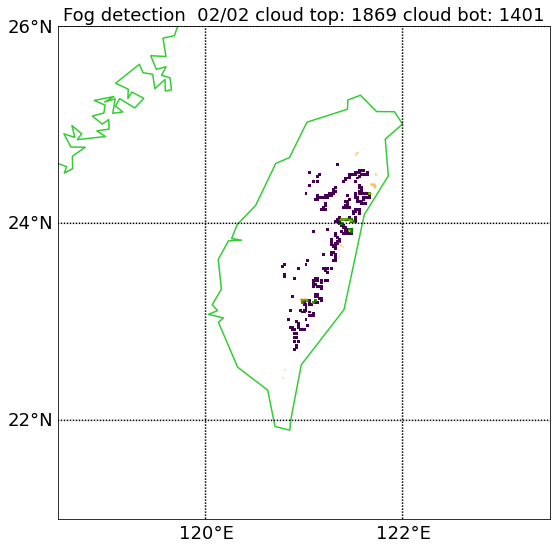

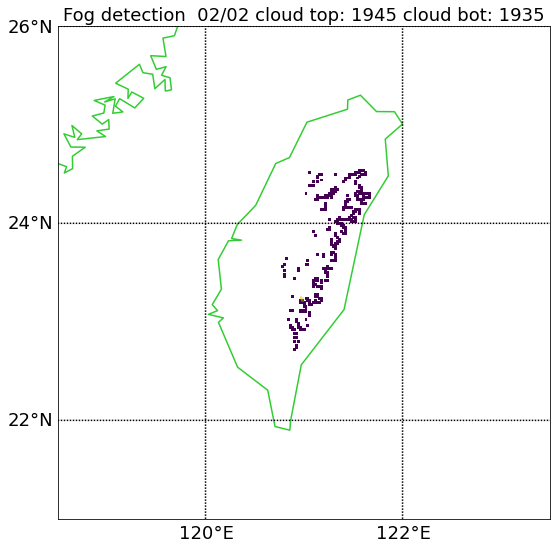

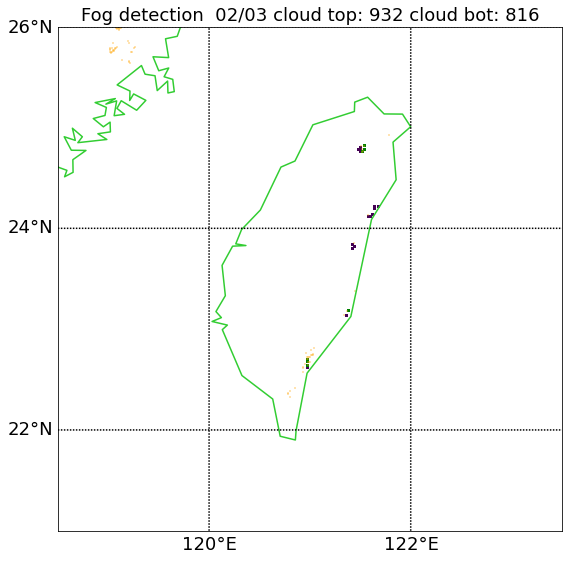

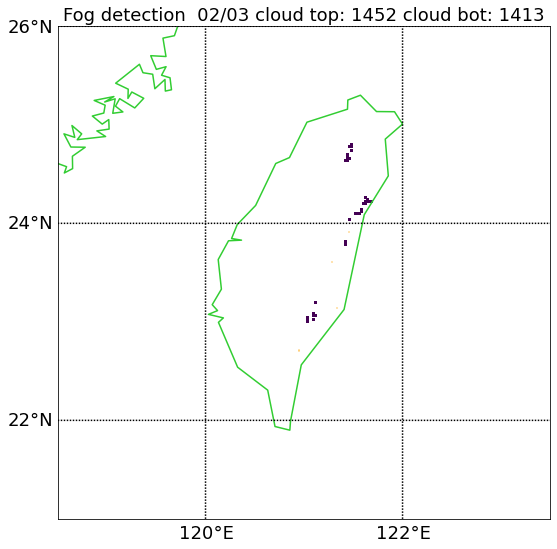

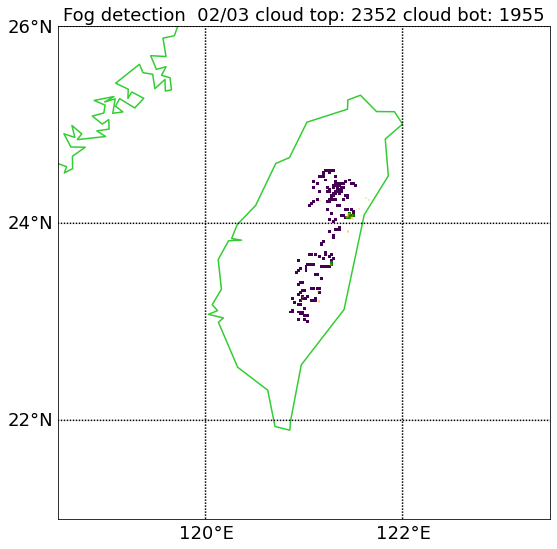

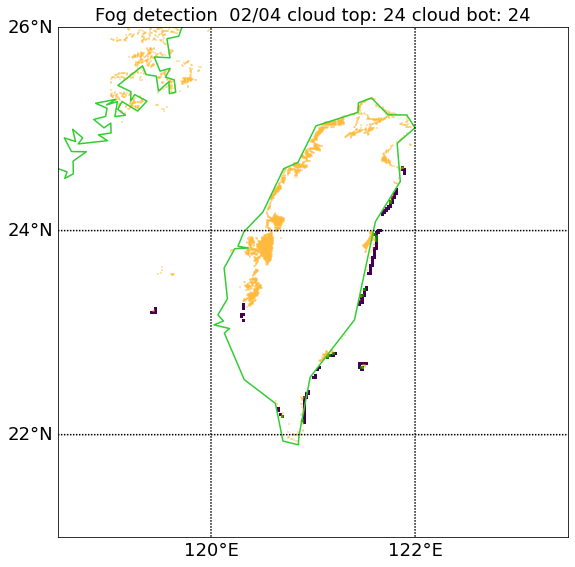

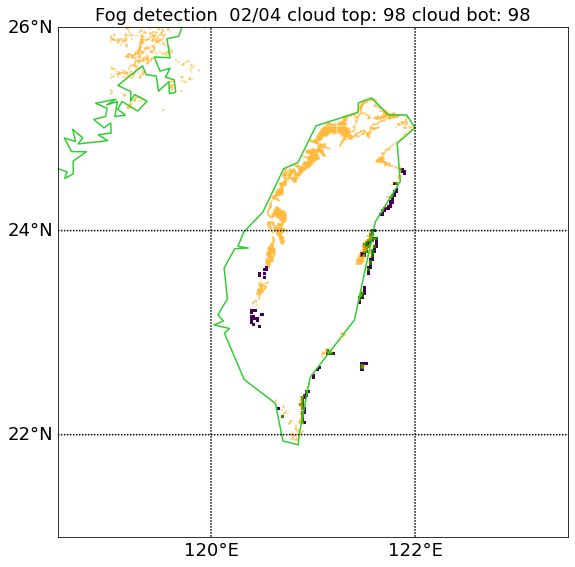

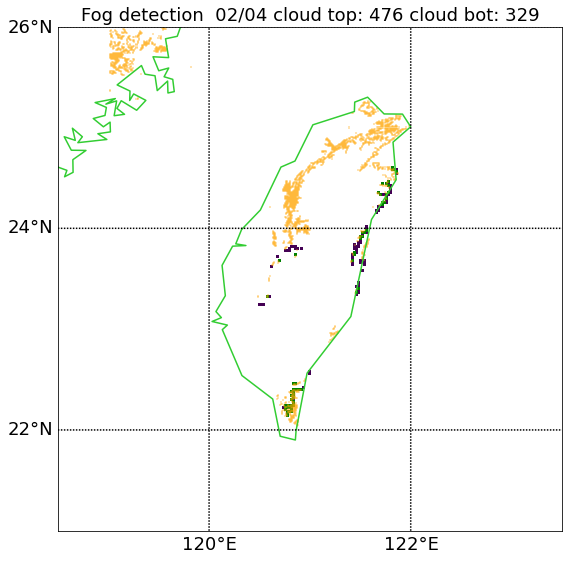

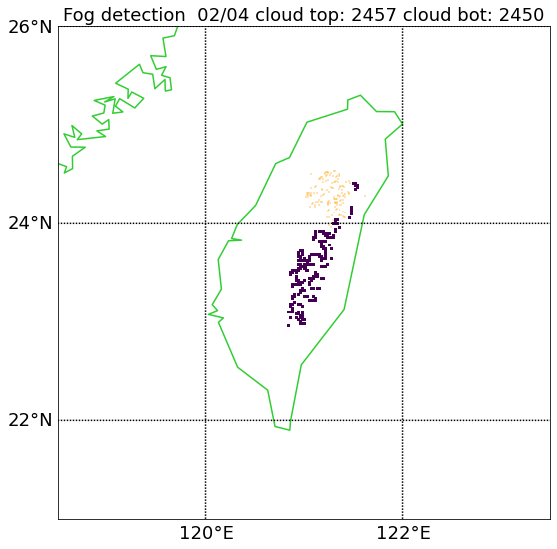

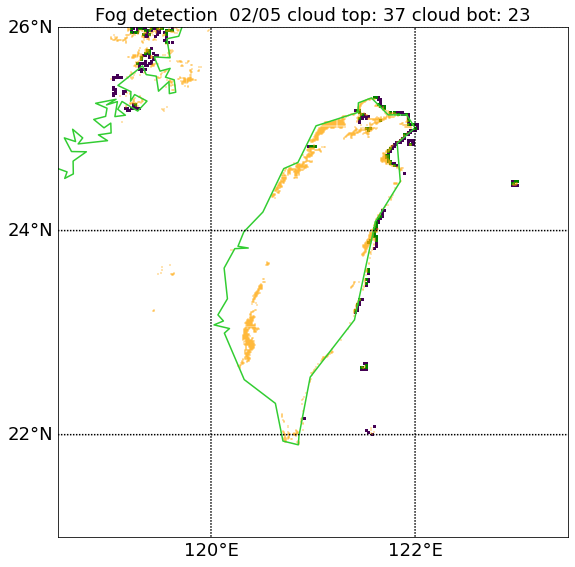

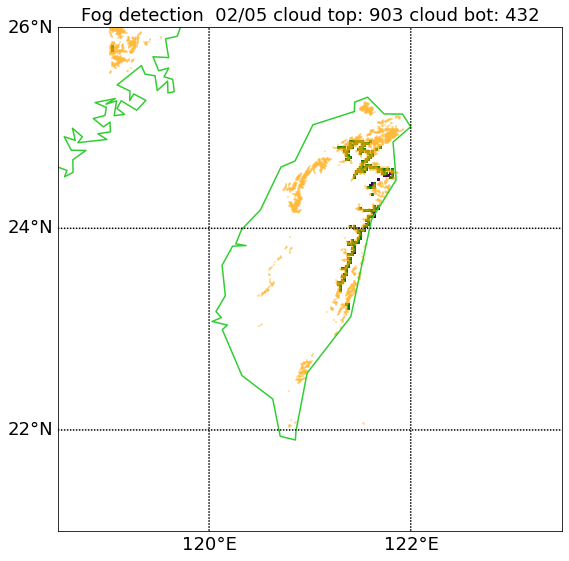

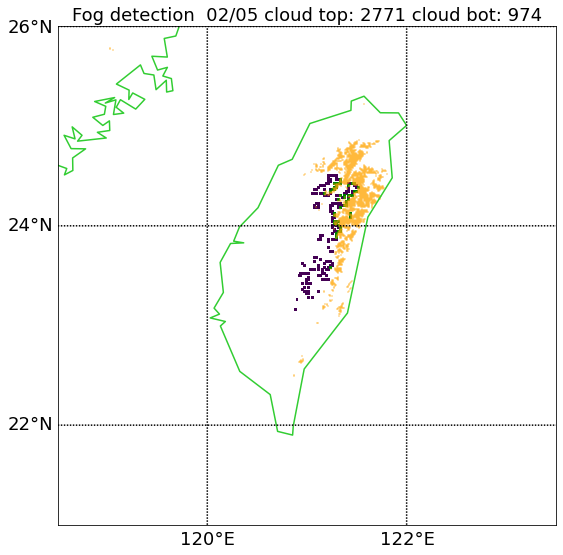

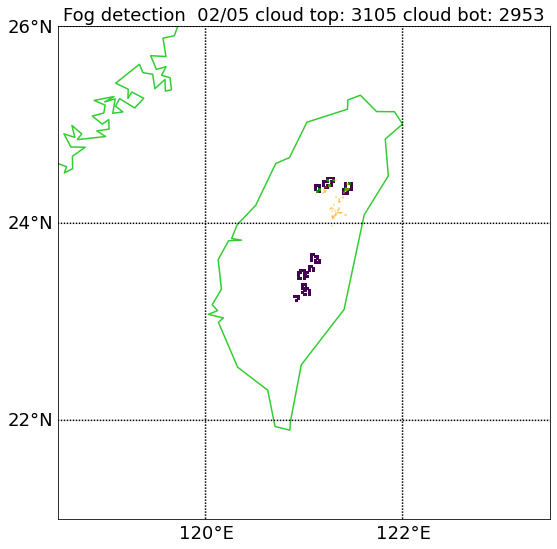

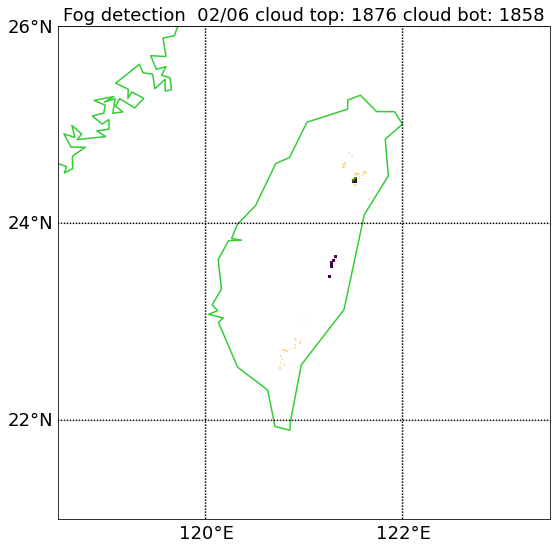

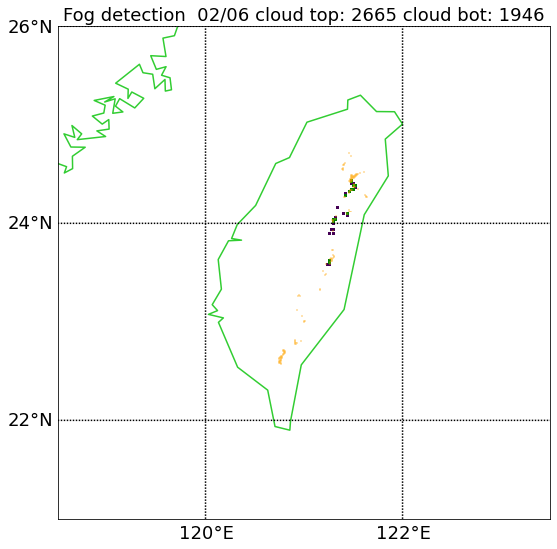

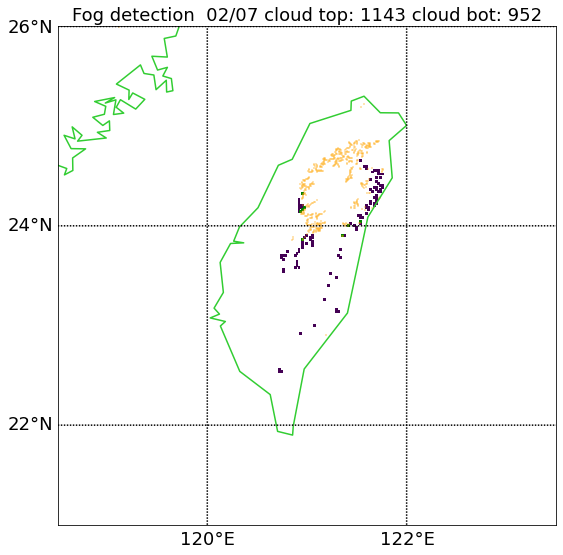

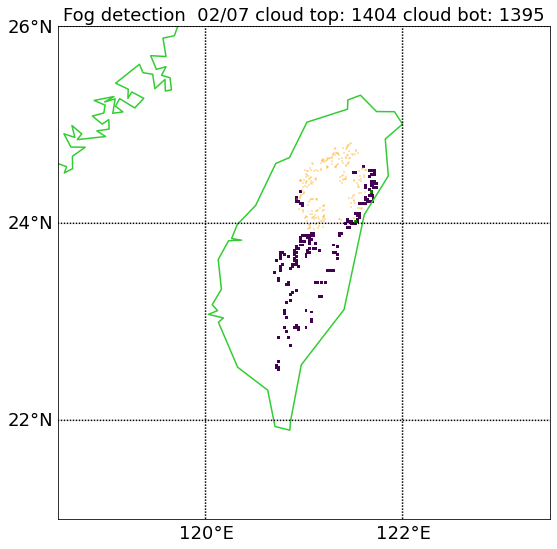

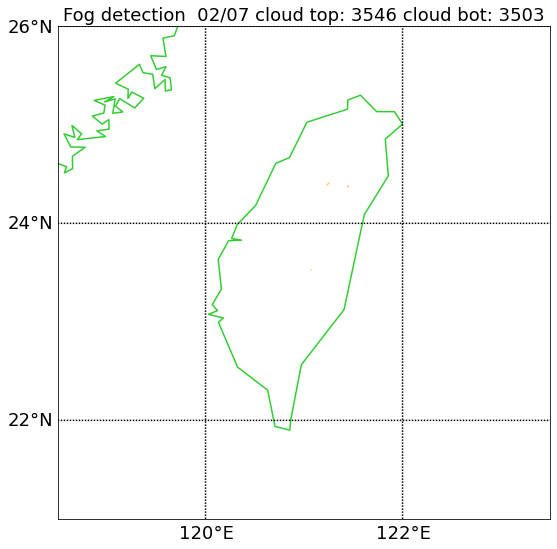

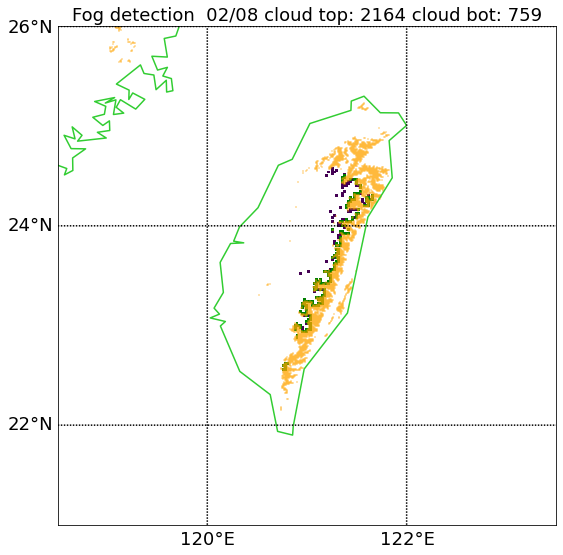

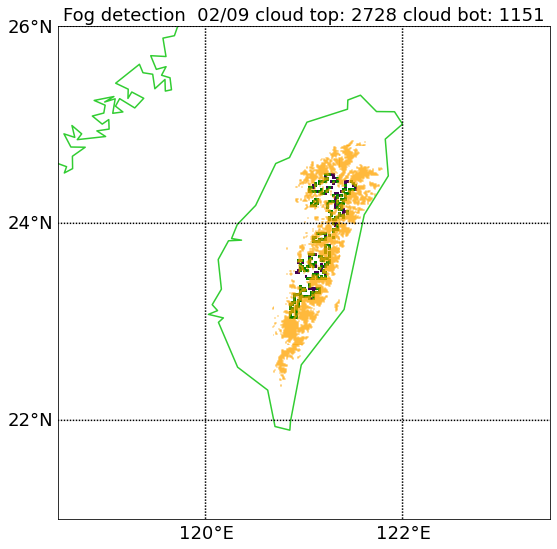

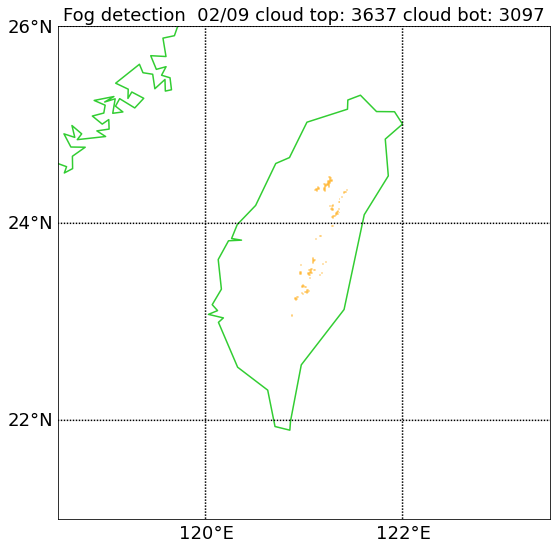

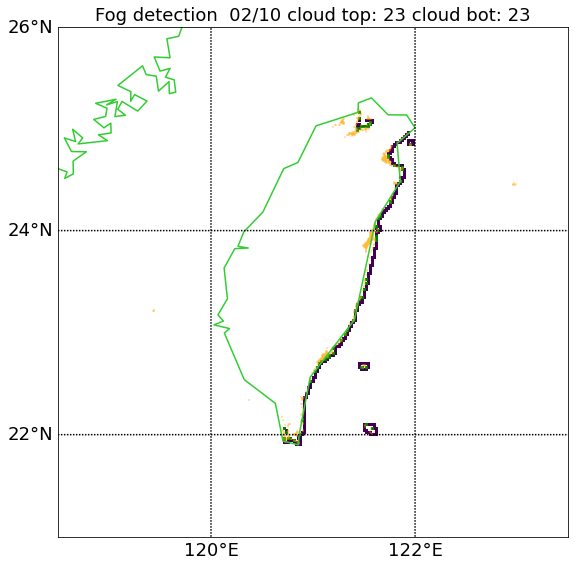

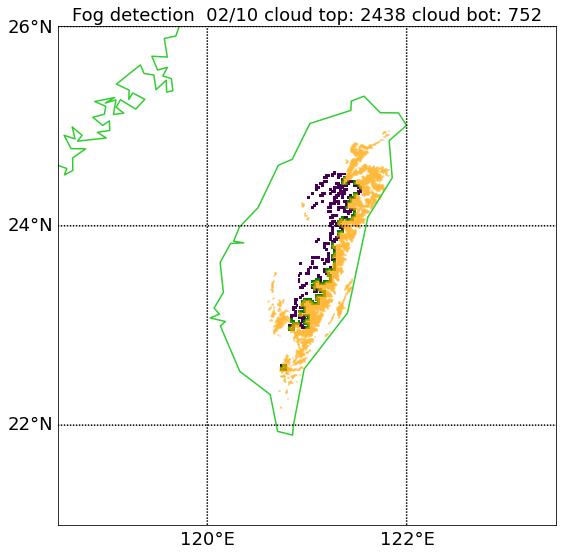

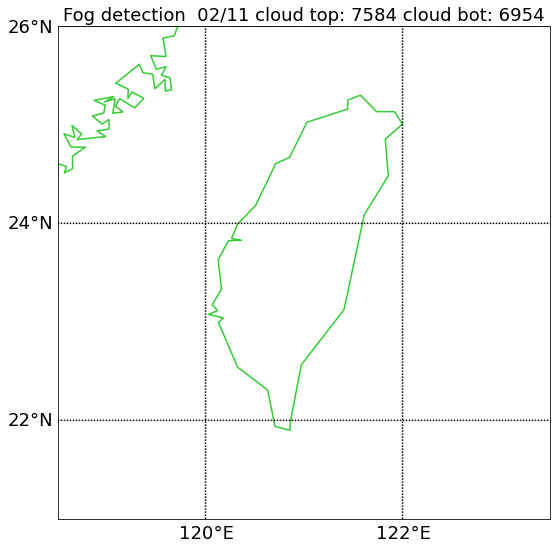

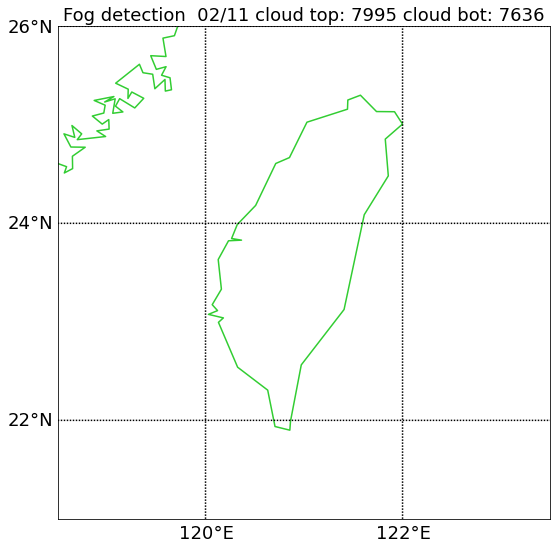

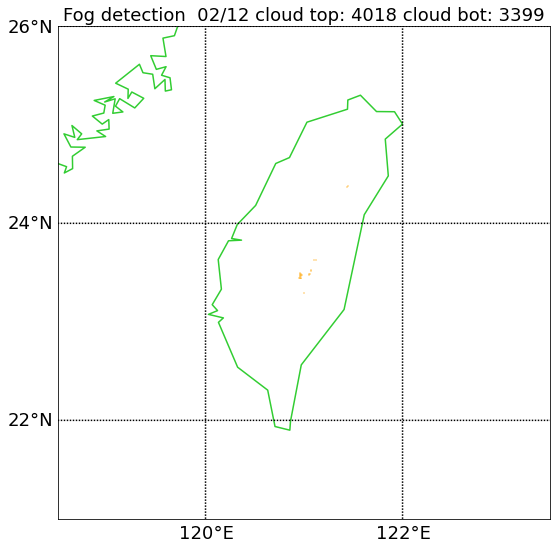

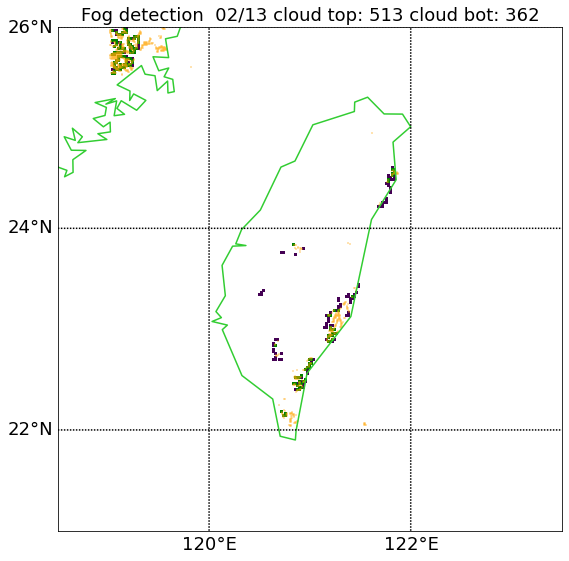

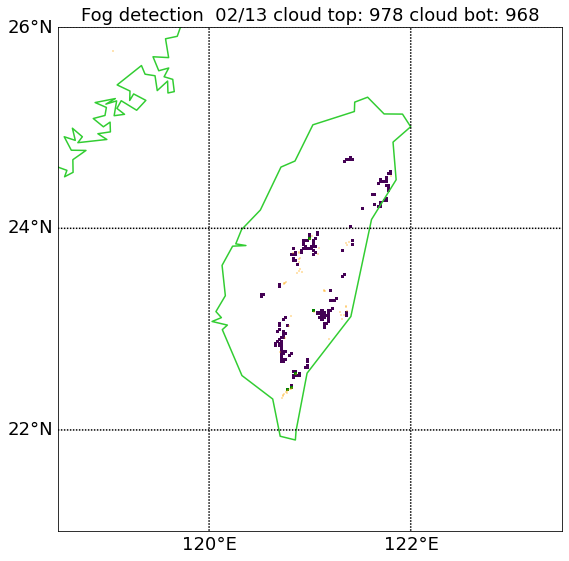

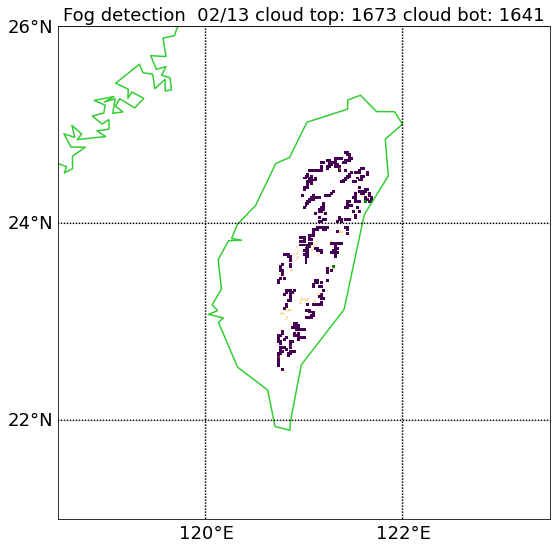

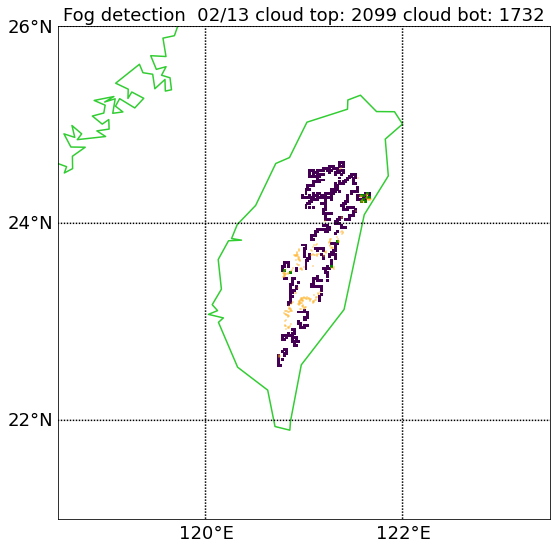

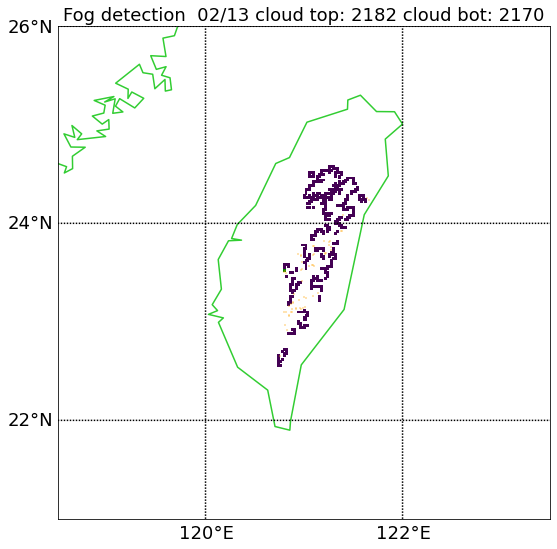

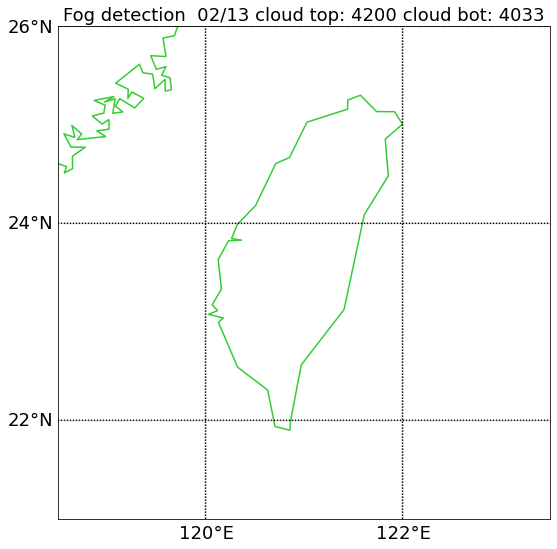

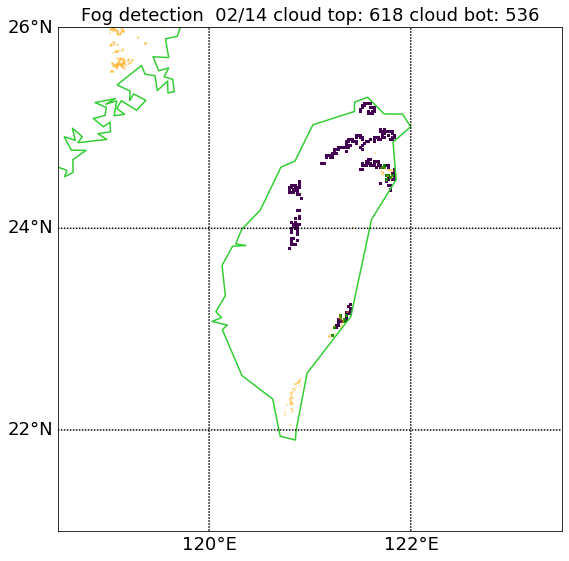

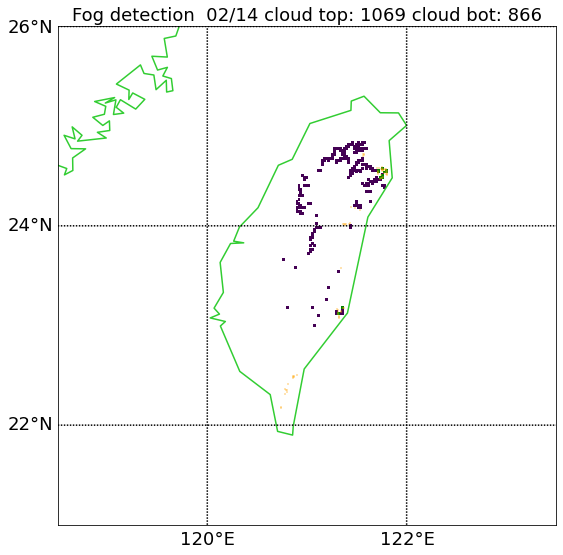

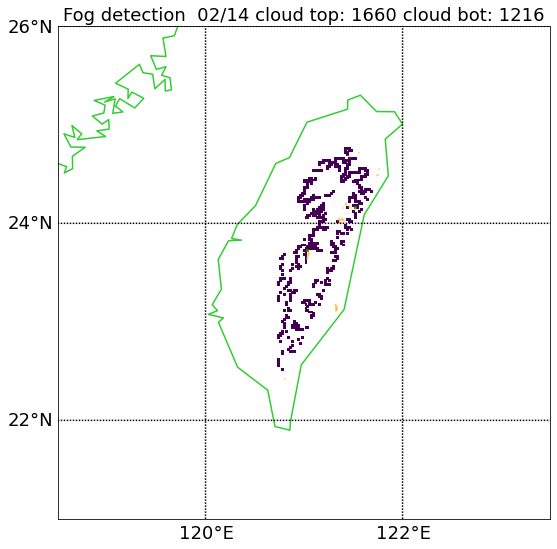

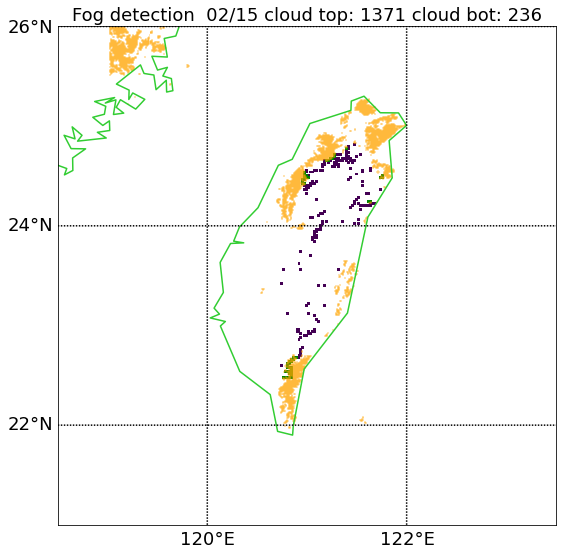

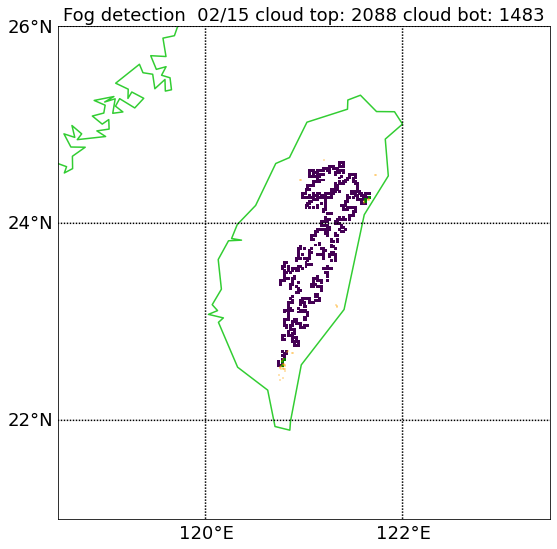

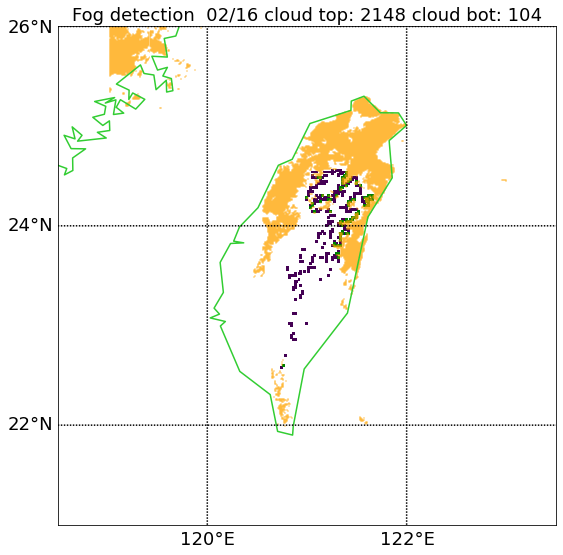

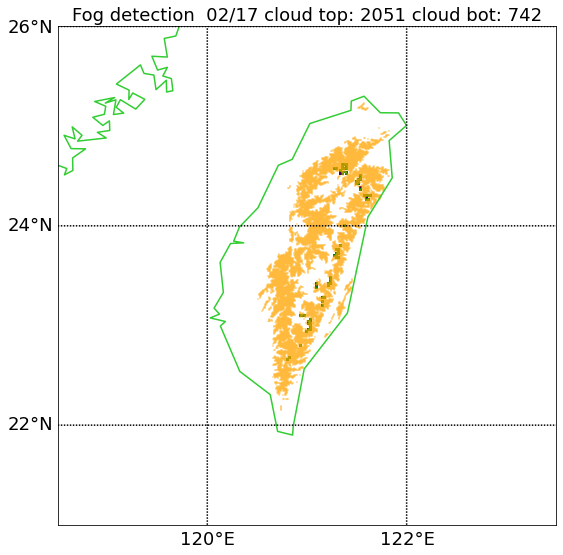

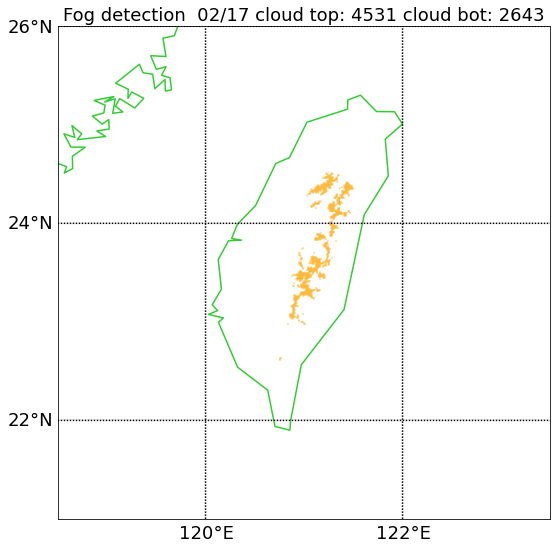

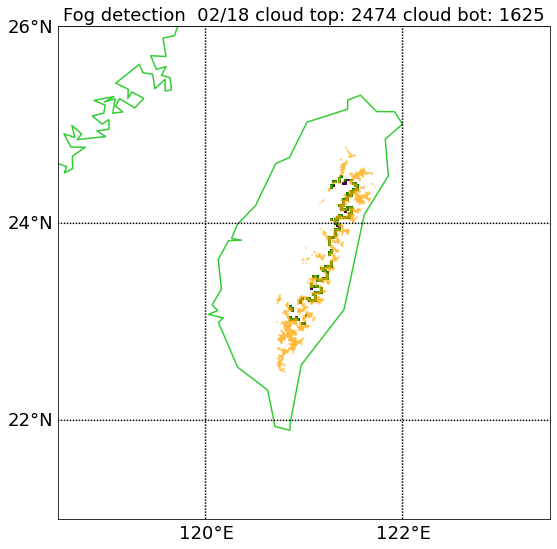

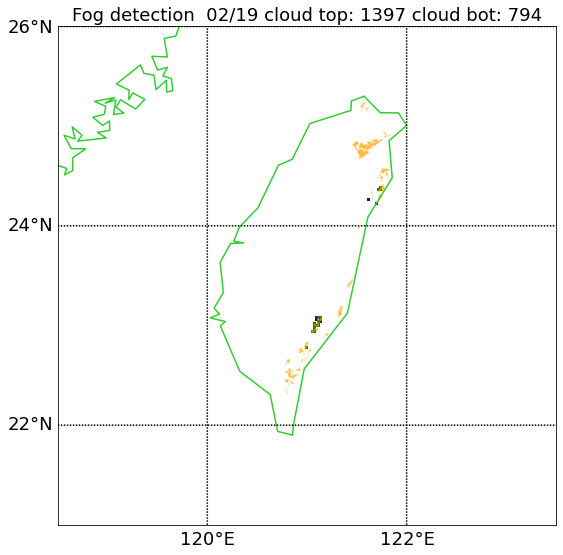

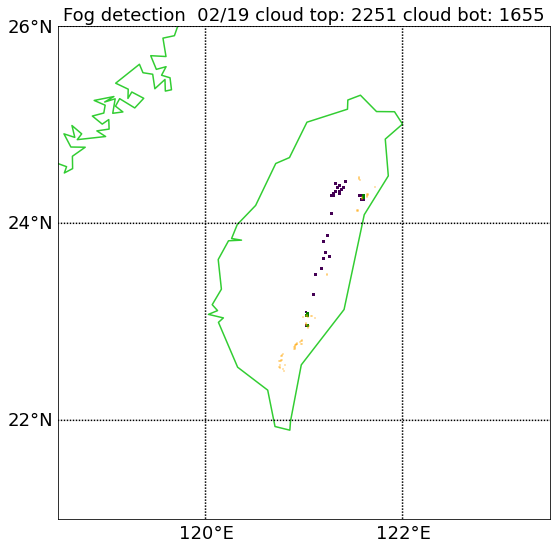

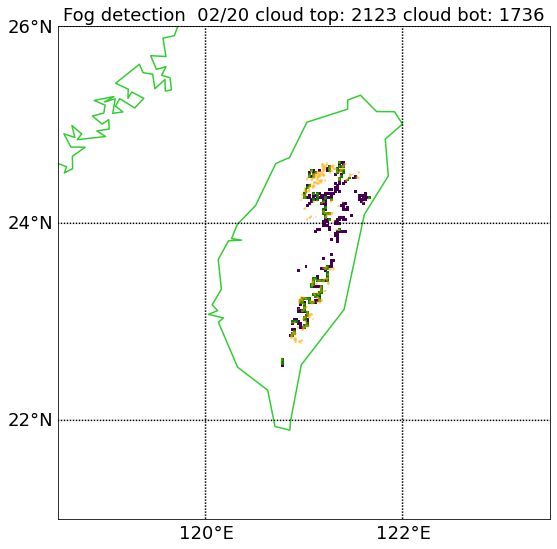

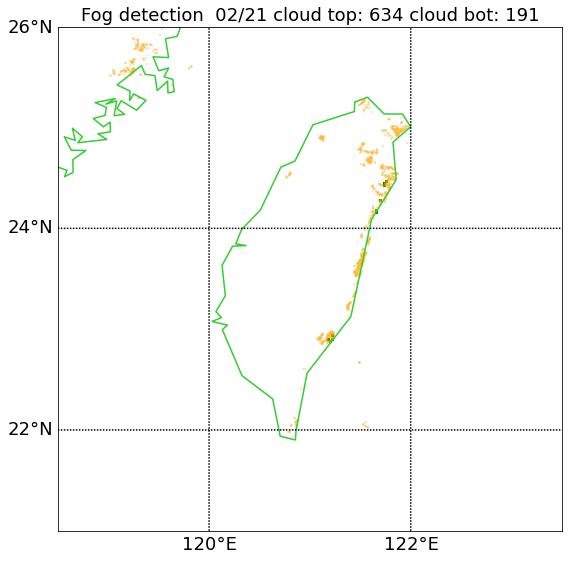

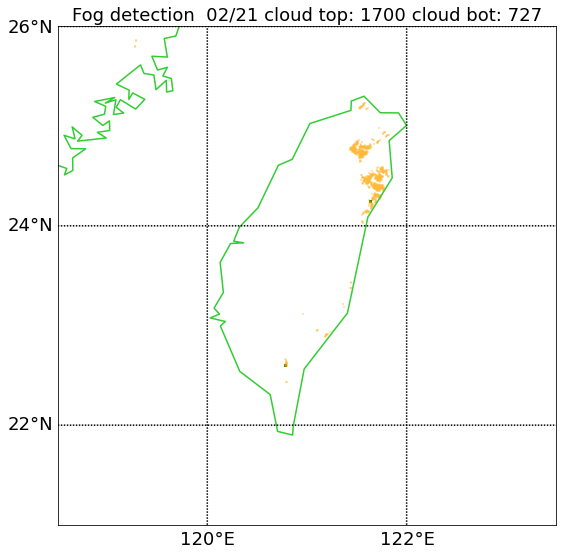

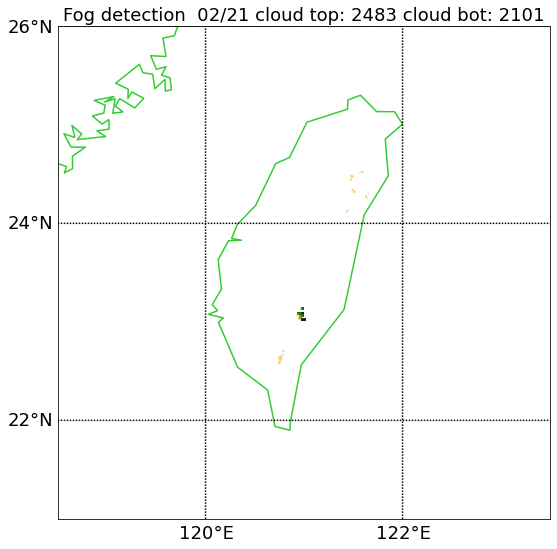

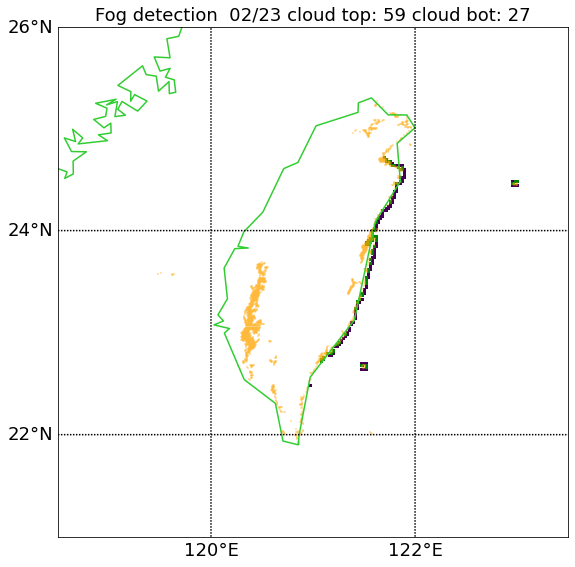

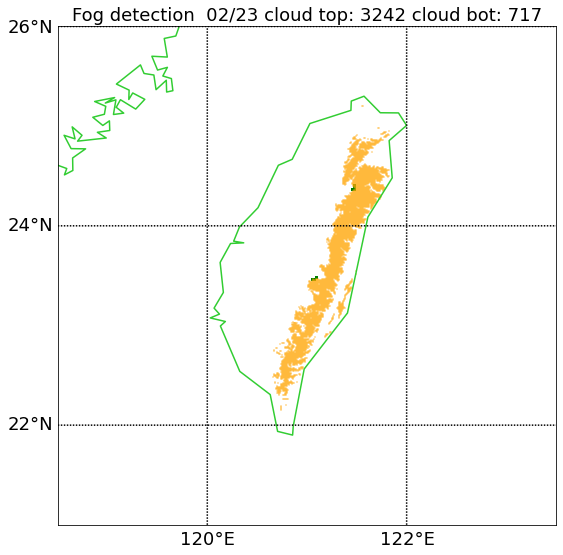

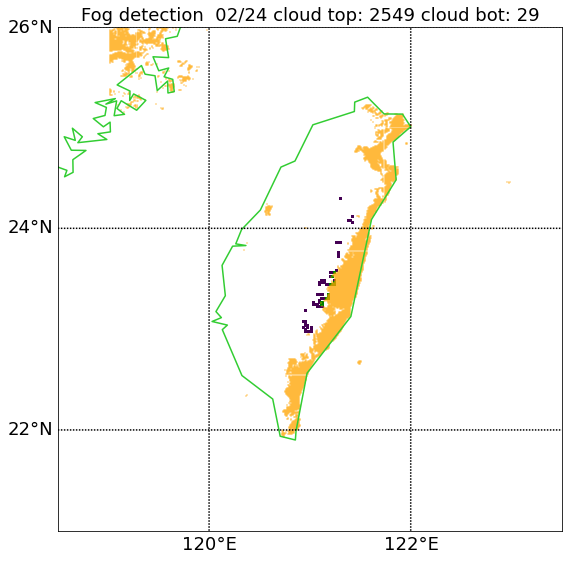

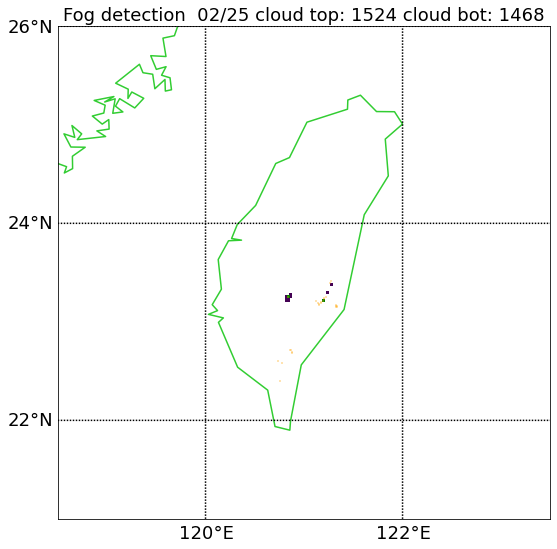

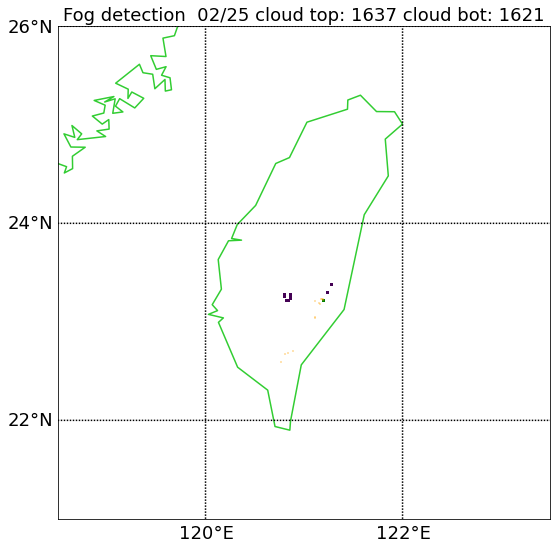

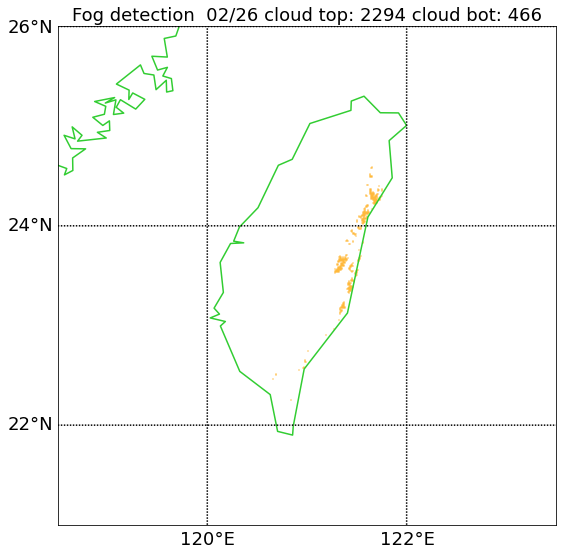

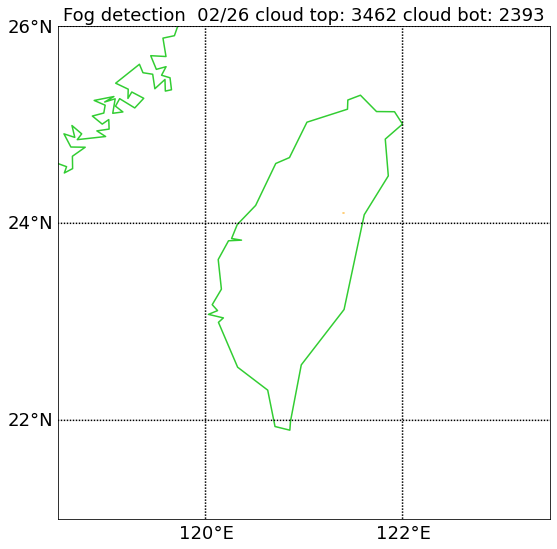

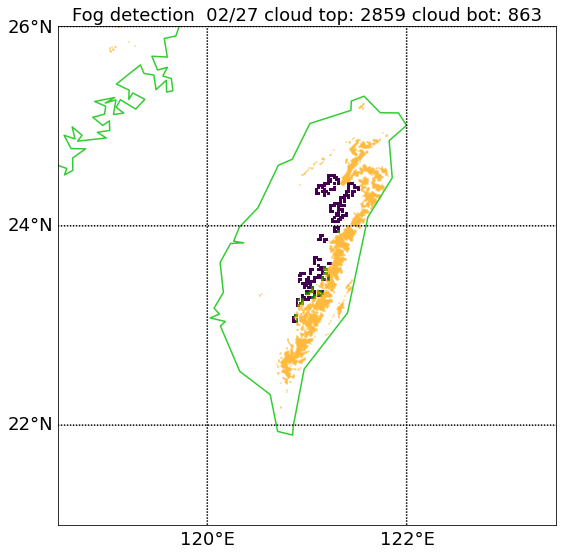

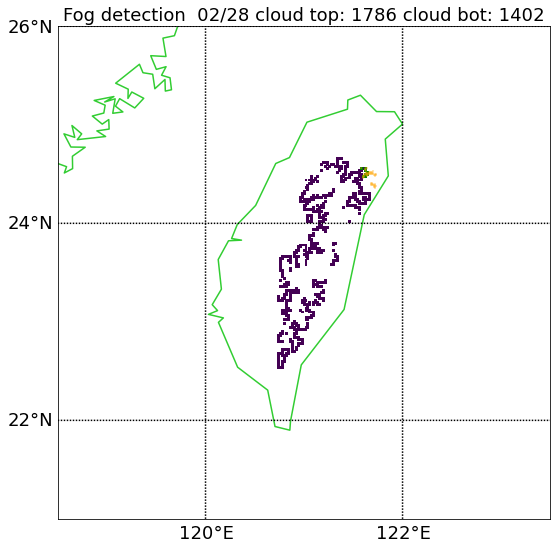

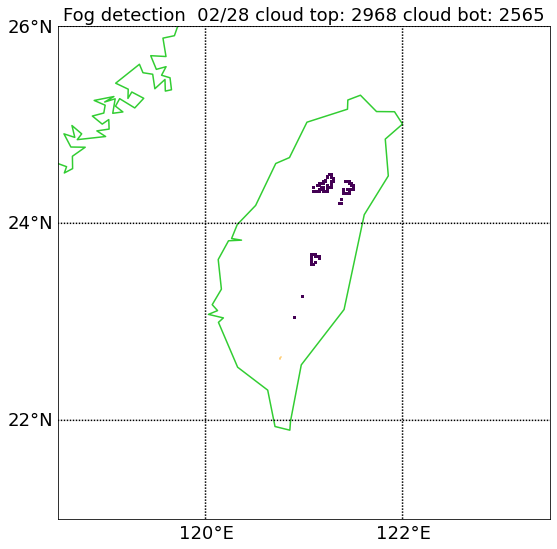

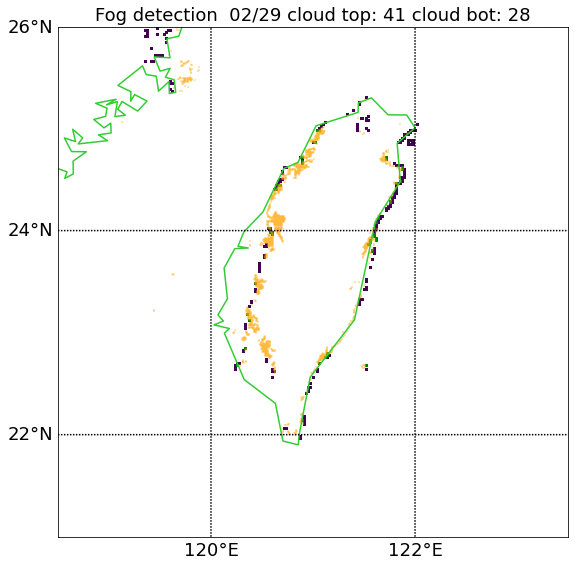

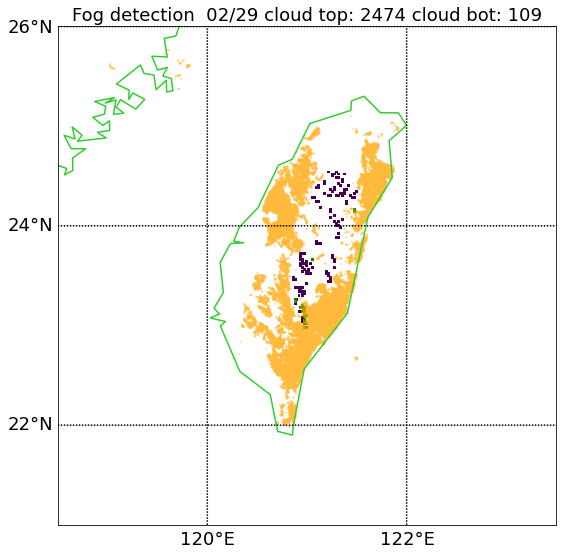

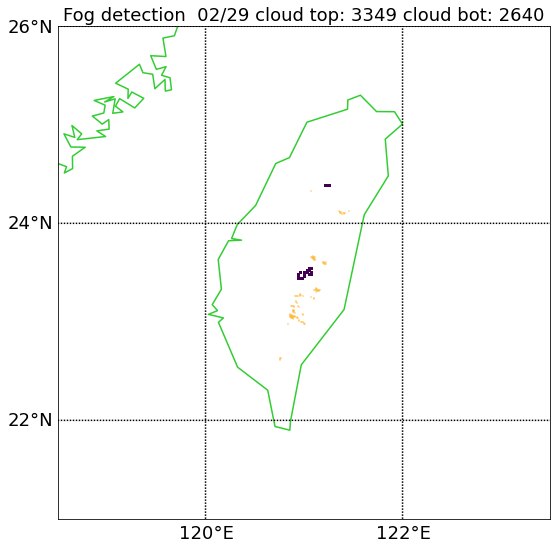

In [177]:
for i in range(0,29):
    day=str(i+1)
    if i <9:
        day='0'+day
    print('day',day)
    hua, hr = read_hua(day)
    hu_h,hu_rh=read_hua_ori(day)
#### find cloud and cloud top
    cloudtop=hu_rh[hu_rh>=90]
    if np.size(cloudtop>0):
        print('hua ori')
        topwhere=np.where(hu_rh>=90)
        #print(topwhere)
        cloudlocate=topwhere[0]
        #print(cloudlocate)
        ori_toplocate=[]
        ori_botlocate=[]
        for k in range(0,np.size(cloudlocate)-1):
            if  cloudlocate[k+1]-cloudlocate[k]>1.1 and hu_h[cloudlocate[k+1]]-hu_h[cloudlocate[k]]>50:
                ori_toplocate.append(cloudlocate[k])
        for k in range(0,np.size(cloudlocate)):
            if k<1:# and hu_h[cloudlocate[k]]>100:
                ori_botlocate.append(cloudlocate[k])
            if k>0:
                #print(cloudlocate[k]-cloudlocate[k-1])
                if cloudlocate[k]-cloudlocate[k-1]>1.1 and hu_h[cloudlocate[k]]-hu_h[cloudlocate[k-1]]>50:
                    ori_botlocate.append(cloudlocate[k])
        ori_toplocate.append(cloudlocate[np.size(cloudlocate)-1])
        print(hu_h[ori_toplocate])
        print(hu_h[ori_botlocate])
        print('       ')
####
####
        fileband=glob.glob('test/test_band13_202002'+day+str(hr)+'00.pkl')
        #print(fileband)
        with open(fileband[0], 'rb') as f:
            band13= pickle.load(f)
        fileband=glob.glob('test_vis/test_band02_202002'+day+str(hr)+'00.pkl')
        #print(fileband)
        with open(fileband[0], 'rb') as f:
            band02= pickle.load(f)
        tw_band13=band13[:,25:226]
        ishi_band13=band13[100:201,180:281].flatten()
        bins=np.arange(265,292.1,0.5)
####find cloud tb
        may_cloud=np.where(ishi_band13>285,0, ishi_band13)
#print(type(may_cloud))
        aa=np.floor(may_cloud)
#print(aa[1000:1200])
        vals,counts = np.unique(aa[aa>0], return_counts=True)
        index = np.argmax(counts)
        most=vals[index]
        print(most)
        #plt.hist(ishi_band13, bins=bins, facecolor='g', alpha=0.75)
        for kk in range(0,np.size(ori_toplocate)):
            height=hu_h[ori_toplocate[kk]]
            #print(height)
            hi_bt=most+3
            lo_bt=most-3
            cloud_mask=fog_filter(tw_band13,topo02,height,hi_bt,lo_bt)
            
#####
            bband02=band02[:,50:451]
            test_topo=ma.masked_where(topo<hu_h[ori_botlocate[kk]]-50, topo)
            if hu_h[ori_botlocate[kk]]<50:
                test_topo=ma.masked_where(topo<hu_h[ori_botlocate[kk]], topo)
            ttopo=ma.masked_where(test_topo>hu_h[ori_toplocate[kk]]+50, test_topo)
            tttopo=ma.masked_where(bband02<=15, ttopo)
            test_grid=np.zeros((250,201))
            for i in range(0,250):
                for j in range(0,201):
                    lat_mask=(local_lat-local13_lat[i])*100
                    lon_mask=(local_lon-local13_lon[j])*100
                    temp=tttopo[abs(lat_mask)<1,:]
                    ta_map=temp[:,abs(lon_mask)<1]
                    aa=ta_map.flatten()
                    val_t=0
                    val_p=0
                    for ii in range(0,aa.size):
                        val_t=val_t+1
                        if aa[ii]>0:
                            val_p=val_p+1
                    test_grid[i,j]=val_p/val_t
            fig = plt.figure(figsize=(8,8)) 
            m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='l')
            m.drawcoastlines(linewidth=1.5,color='limegreen')
            m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
            m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)

            cmap2 = cm.get_cmap("gray_r",lut=27)
            cmap2.set_under("white")
            cmap2.set_over("k")
            out1=ma.masked_where(band13>most+3, band13)
            out=ma.masked_where(out1<most-3, out1)
            #m.pcolormesh(hi02_lon,hi02_lat,out,cmap=cmap2,vmin=265,vmax=292)
            out=ma.masked_where(cloud_mask<0.5, cloud_mask)
            out_vis_mask=ma.masked_where(test_grid<0.1,out)
            m.pcolormesh(local13_lon,local13_lat,out)
            cmap3 = cm.get_cmap("terrain",lut=19)
            cmap3.set_under("w")
            cmap3.set_over("green")
            m.pcolormesh(local13_lon,local13_lat,out_vis_mask,cmap=cmap3,vmin=-10,vmax=0)
###
            cmap2 = cm.get_cmap("terrain",lut=19)
            cmap2.set_under("w")
            cmap2.set_over("orange")
            m.pcolormesh(local_lon,local_lat,tttopo,cmap=cmap2,vmin=-10,vmax=10,alpha=0.3)
####
            plt.title('Fog detection  02/' + day + ' cloud top: '+str(int(hu_h[ori_toplocate[kk]]))+' cloud bot: '+str(int(hu_h[ori_botlocate[kk]]))+'',fontsize=18)
            plt.tight_layout()
            plt.savefig('with_orisounding_hua_hi_vis_regrid_02_' + day + '_'+str(int(height))+'.png',dpi=300)

In [143]:
for i in range(0,29):
    day=str(i+1)
    if i <9:
        day='0'+day
    #print('day',day)
    hua, hr = read_hua(day)
    hu_h,hu_rh=read_hua_ori(day)
#### find cloud and cloud top
    cloudtop=hua[hua[:,2]>=90,:]
    if np.size(cloudtop>0):
        #print('day',day)
        #print('hua')
        topwhere=np.where(hua[:,2]>=90)
        #print(topwhere)
        cloudlocate=topwhere[0]
        #print(cloudlocate)
        toplocate=[]
        botlocate=[]
        for k in range(0,np.size(cloudlocate)-1):
            if cloudlocate[k+1]-cloudlocate[k]>1.1:
                toplocate.append(cloudlocate[k])
        for k in range(0,np.size(cloudlocate)):
            if k<1:
                botlocate.append(cloudlocate[k])
            if k>0:
                #print(cloudlocate[k]-cloudlocate[k-1])
                if cloudlocate[k]-cloudlocate[k-1]>1.1:
                    botlocate.append(cloudlocate[k])
        toplocate.append(cloudlocate[np.size(cloudlocate)-1])
        #print(hua[toplocate,0])
        #print(hua[botlocate,0])
    cloudtop=hu_rh[hu_rh>=90]
    if np.size(cloudtop>0):
        #print('hua ori')
        topwhere=np.where(hu_rh>=90)
        #print(topwhere)
        cloudlocate=topwhere[0]
        #print(cloudlocate)
        ori_toplocate=[]
        ori_botlocate=[]
        for k in range(0,np.size(cloudlocate)-1):
            if  cloudlocate[k+1]-cloudlocate[k]>1.1 and hu_h[cloudlocate[k+1]]-hu_h[cloudlocate[k]]>50 and hu_h[cloudlocate[k]]>100:
                ori_toplocate.append(cloudlocate[k])
        for k in range(0,np.size(cloudlocate)):
            if k<1 and hu_h[cloudlocate[k]]>100:
                ori_botlocate.append(cloudlocate[k])
            if k>0:
                #print(cloudlocate[k]-cloudlocate[k-1])
                if cloudlocate[k]-cloudlocate[k-1]>1.1 and hu_h[cloudlocate[k]]-hu_h[cloudlocate[k-1]]>50 and hu_h[cloudlocate[k]]>100:
                    ori_botlocate.append(cloudlocate[k])
        ori_toplocate.append(cloudlocate[np.size(cloudlocate)-1])
        if  np.size(ori_toplocate) > np.size(toplocate):
            print('day',day)
            print('hua')
            print(hua[toplocate,0])
            print(hua[botlocate,0])
            print('hua ori')
            print(hu_h[ori_toplocate])
            print(hu_h[ori_botlocate])
            print('       ')

day 02
hua
[1857.]
[1461.]
hua ori
[1124. 1869. 1945.]
[1022. 1401. 1935.]
       
day 03
hua
[ 914. 2320.]
[ 854. 2320.]
hua ori
[ 932. 1452. 2352.]
[ 816. 1413. 1955.]
       
day 05
hua
[2649.]
[596.]
hua ori
[ 903. 2771. 3105.]
[ 432.  974. 2953.]
       
day 06
hua
[2665.]
[2025.]
hua ori
[1876. 2665.]
[1858. 1946.]
       
day 11
hua
[7537.]
[7073.]
hua ori
[7584. 7995.]
[6954. 7636.]
       
day 13
hua
[ 481. 2182. 4180.]
[ 481. 2075. 4180.]
hua ori
[ 513.  978. 1673. 2099. 2182. 4200.]
[ 362.  968. 1641. 1732. 2170. 4033.]
       
day 14
hua
[1625.]
[1531.]
hua ori
[ 618. 1069. 1660.]
[ 536.  866. 1216.]
       
day 21
hua
[1694. 2483.]
[ 203. 2291.]
hua ori
[ 634. 1700. 2483.]
[ 191.  727. 2101.]
       
day 25
hua
[1495.]
[1495.]
hua ori
[1524. 1637.]
[1468. 1621.]
       
day 26
hua
[3449.]
[840.]
hua ori
[2294. 3462.]
[ 466. 2393.]
       
day 29
hua
[3336.]
[142.]
hua ori
[2474. 3349.]
[ 109. 2640.]
       


In [179]:
for i in range(0,29):
    day=str(i+1)
    if i <9:
        day='0'+day
    #print('day',day)
    hua, hr = read_hua(day)
    hu_h,hu_rh=read_hua_ori(day)
#### find cloud and cloud top
    cloudtop=hua[hua[:,2]>=90,:]
    if np.size(cloudtop>0):
        #print('day',day)
        #print('hua')
        topwhere=np.where(hua[:,2]>=90)
        #print(topwhere)
        cloudlocate=topwhere[0]
        #print(cloudlocate)
        toplocate=[]
        botlocate=[]
        for k in range(0,np.size(cloudlocate)-1):
            if cloudlocate[k+1]-cloudlocate[k]>1.1:
                toplocate.append(cloudlocate[k])
        for k in range(0,np.size(cloudlocate)):
            if k<1:
                botlocate.append(cloudlocate[k])
            if k>0:
                #print(cloudlocate[k]-cloudlocate[k-1])
                if cloudlocate[k]-cloudlocate[k-1]>1.1:
                    botlocate.append(cloudlocate[k])
        toplocate.append(cloudlocate[np.size(cloudlocate)-1])
        #print(hua[toplocate,0])
        #print(hua[botlocate,0])
    cloudtop=hu_rh[hu_rh>=90]
    if np.size(cloudtop>0):
        #print('hua ori')
        topwhere=np.where(hu_rh>=90)
        #print(topwhere)
        cloudlocate=topwhere[0]
        #print(cloudlocate)
        ori_toplocate=[]
        ori_botlocate=[]
        for k in range(0,np.size(cloudlocate)-1):
            if  cloudlocate[k+1]-cloudlocate[k]>1.1 and hu_h[cloudlocate[k+1]]-hu_h[cloudlocate[k]]>50:
                ori_toplocate.append(cloudlocate[k])
        for k in range(0,np.size(cloudlocate)):
            if k<1:
                ori_botlocate.append(cloudlocate[k])
            if k>0:
                #print(cloudlocate[k]-cloudlocate[k-1])
                if cloudlocate[k]-cloudlocate[k-1]>1.1 and hu_h[cloudlocate[k]]-hu_h[cloudlocate[k-1]]>50:
                    ori_botlocate.append(cloudlocate[k])
        ori_toplocate.append(cloudlocate[np.size(cloudlocate)-1])
        if  np.size(ori_toplocate) > np.size(toplocate):
            print('day',day)
            print('hua')
            print(hua[toplocate,0])
            print(hua[botlocate,0])
            print('hua ori')
            print(hu_h[ori_toplocate])
            print(hu_h[ori_botlocate])
            print('       ')

day 02
hua
[1857.]
[1461.]
hua ori
[1124. 1869. 1945.]
[1022. 1401. 1935.]
       
day 03
hua
[ 914. 2320.]
[ 854. 2320.]
hua ori
[ 932. 1452. 2352.]
[ 816. 1413. 1955.]
       
day 04
hua
[ 432. 2457.]
[ 400. 2457.]
hua ori
[  24.   98.  476. 2457.]
[  24.   98.  329. 2450.]
       
day 05
hua
[2649.]
[596.]
hua ori
[  37.  903. 2771. 3105.]
[  23.  432.  974. 2953.]
       
day 06
hua
[2665.]
[2025.]
hua ori
[1876. 2665.]
[1858. 1946.]
       
day 10
hua
[2421.]
[774.]
hua ori
[  23. 2438.]
[ 23. 752.]
       
day 11
hua
[7537.]
[7073.]
hua ori
[7584. 7995.]
[6954. 7636.]
       
day 13
hua
[ 481. 2182. 4180.]
[ 481. 2075. 4180.]
hua ori
[ 513.  978. 1673. 2099. 2182. 4200.]
[ 362.  968. 1641. 1732. 2170. 4033.]
       
day 14
hua
[1625.]
[1531.]
hua ori
[ 618. 1069. 1660.]
[ 536.  866. 1216.]
       
day 21
hua
[1694. 2483.]
[ 203. 2291.]
hua ori
[ 634. 1700. 2483.]
[ 191.  727. 2101.]
       
day 23
hua
[3242.]
[898.]
hua ori
[  59. 3242.]
[ 27. 717.]
       
day 25
hua
[1495.]
[14